In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pylab import rcParams

In [2]:
iris_data = pd.read_csv("iris.data")

In [3]:
iris_data.columns =["sepal length","sepal width","petal length","petal width","class"]
iris_data

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


## Normalizing Numerical Data Using min-max

In [4]:
iris_minmax = iris_data.copy()

In [5]:
# Normalizing sepal_length
iris_minmax["sepal length"]=[(i-min(iris_data["sepal length"]))/ (max(iris_data["sepal length"])-min(iris_data["sepal length"])) for i in iris_data['sepal length']]

In [6]:
# Normalizing sepal_width
iris_minmax["sepal width"]=[(i-min(iris_data["sepal width"]))/ (max(iris_data["sepal width"])-min(iris_data["sepal width"])) for i in iris_data['sepal width']]

In [7]:
# Normalizing petal_length
iris_minmax["petal length"]=[(i-min(iris_data["petal length"]))/ (max(iris_data["petal length"])-min(iris_data["petal length"])) for i in iris_data['petal length']]

In [8]:
# Normalizing petal_width
iris_minmax["petal width"]=[(i-min(iris_data["petal width"]))/ (max(iris_data["petal width"])-min(iris_data["petal width"])) for i in iris_data['petal width']]

In [9]:
# Normalized data set
iris_minmax

,sepal length,sepal width,petal length,petal width,class
0,0.166667,0.416667,0.067797,0.041667,Iris-setosa
1,0.111111,0.500000,0.050847,0.041667,Iris-setosa
2,0.083333,0.458333,0.084746,0.041667,Iris-setosa
3,0.194444,0.666667,0.067797,0.041667,Iris-setosa
4,0.305556,0.791667,0.118644,0.125000,Iris-setosa
...,...,...,...,...,...
144,0.666667,0.416667,0.711864,0.916667,Iris-virginica
145,0.555556,0.208333,0.677966,0.750000,Iris-virginica
146,0.611111,0.416667,0.711864,0.791667,Iris-virginica
147,0.527778,0.583333,0.745763,0.916667,Iris-virginica


## Normalizing with z-score method

In [10]:
iris_zscore = iris_data.copy()

In [11]:
# Normalizing sepal_length
iris_zscore["sepal length"]=[(i-np.mean(iris_data["sepal length"]))/ (np.std(iris_data["sepal length"])) for i in iris_data['sepal length']]

In [12]:
# Normalizing sepal_width
iris_zscore["sepal width"]=[(i-np.mean(iris_data["sepal width"]))/ (np.std(iris_data["sepal width"])) for i in iris_data['sepal width']]

In [13]:
# Normalizing petal_length
iris_zscore["petal length"]=[(i-np.mean(iris_data["petal length"]))/ (np.std(iris_data["petal length"])) for i in iris_data['petal length']]

In [14]:
# Normalizing petal_width
iris_zscore["petal width"]=[(i-np.mean(iris_data["petal width"]))/ (np.std(iris_data["petal width"])) for i in iris_data['petal width']]

In [15]:
iris_zscore

,sepal length,sepal width,petal length,petal width,class
0,-1.148356,-0.118060,-1.353964,-1.325063,Iris-setosa
1,-1.390542,0.344859,-1.410986,-1.325063,Iris-setosa
2,-1.511636,0.113399,-1.296943,-1.325063,Iris-setosa
3,-1.027262,1.270695,-1.353964,-1.325063,Iris-setosa
4,-0.542889,1.965072,-1.182901,-1.061466,Iris-setosa
...,...,...,...,...,...
144,1.031326,-0.118060,0.812838,1.442709,Iris-virginica
145,0.546952,-1.275355,0.698796,0.915514,Iris-virginica
146,0.789139,-0.118060,0.812838,1.047313,Iris-virginica
147,0.425859,0.807777,0.926880,1.442709,Iris-virginica


## (2)(a)(1) K-Mean Method with Euclidean Distance

In [16]:
import copy

# Euclidian Distance Approach

def Euclidian(X,centroids):
    X_out = X.copy()
    for i in centroids.keys():
        X_out["distance_from_{}".format(i)] = np.array(np.sqrt(((X-centroids[i])**2).sum(axis = 1)))  # Euclidian Distance
    centroid_distance = ["distance_from_{}".format(i) for i in centroids.keys()] # distance of every point from every centroid
    X_out["closest"] = X_out.loc[:,centroid_distance].idxmin(axis=1)
    X_out["closest"] = X_out["closest"].map(lambda x: int(x.lstrip("distance_from")))
    X_out["color"] = X_out["closest"].map(lambda x:colors[x]) # clustering the points to the closest centroid in corresponded color
    return X_out

# centroids optimazition

def opt(X_dist, centroids):
    for i in centroids.keys():
        centroids[i] = np.array(X[X_dist["closest"] == i].mean(axis = 0))
    return centroids

#### Select the number of clusters

In [17]:
# Drop "class" column
X = iris_minmax.drop("class",axis=1)

# Finding distance points from cluster center
center = []
K = range(1,10)
for i in K:
    k_model = KMeans(n_clusters = i)
    k_model.fit(X)
    center.append(k_model.inertia_)

C:\Users\Jiunn Yih Lee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


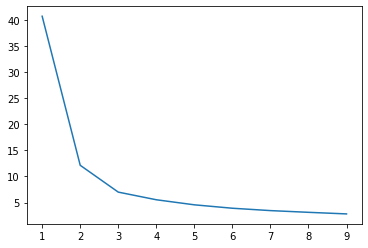

In [18]:
# using elbow method for optimal value of k, which is 3 in this case
plt.plot(K,center)

We select 3 clusters for this dataset

In [19]:
k = 3

#### Using Min-Max method to normalize

In [20]:
X = iris_minmax[["sepal length","sepal width", "petal length", "petal width"]]

In [21]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,0.430089,0.437919,0.470254,0.460570
std,0.230165,0.180625,0.298246,0.317205
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.576271,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [22]:
# randomly pick three centroids in the randomly distributed data 
np.random.seed(202)
centers_index = np.random.choice(np.arange(X.shape[0]), size = k, replace = False)
centroids = {i+1: np.array(X.iloc[centers_index[i]]) for i in range(k)}

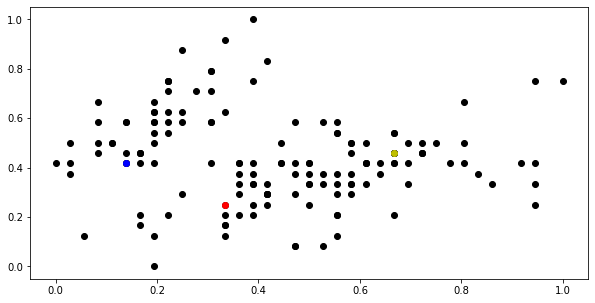

In [23]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X["sepal length"],X["sepal width"],color="k")

# make three centroids color in red, yellow and blue
colors = {1:"r",2:"y",3:"b"}
for i in centroids.keys():
    plt.scatter(*centroids[i][:2],color=colors[i])

plt.show()

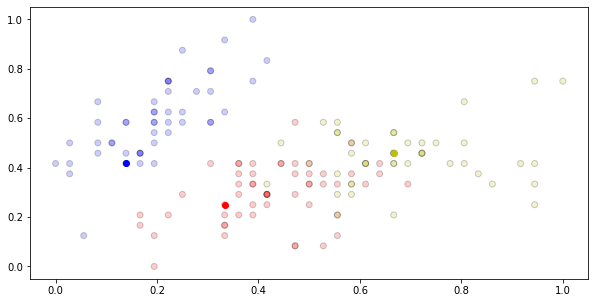

In [24]:
# cluster result based on the intial random centroids
X_dist = Euclidian(X,centroids)
fig = plt.figure(figsize=(10,5))
plt.scatter(X_dist["sepal length"],X_dist["sepal width"],alpha = 0.2,color = X_dist["color"],edgecolor="k")
for i in centroids.keys():
    plt.scatter(*centroids[i][:2],color=colors[i][:2])
plt.show()
         

In [25]:
# repeat the steps until the clusters don't move anymore
count = 0
while True:
    count += 1
    print("Iteration %d." % count)
    centroids_closest = X_dist["closest"].copy(deep=True)
    centroids = opt(X_dist, centroids)   # # repeat the previous optimazation for further optimization
    X_dist = Euclidian(X,centroids)
    print(X_dist.closest.value_counts())
    if centroids_closest.equals(X_dist["closest"]):
        break

Iteration 1.
1    59
3    49
2    41
Name: closest, dtype: int64
Iteration 2.
1    60
3    49
2    40
Name: closest, dtype: int64
Iteration 3.
1    61
3    49
2    39
Name: closest, dtype: int64
Iteration 4.
1    61
3    49
2    39
Name: closest, dtype: int64


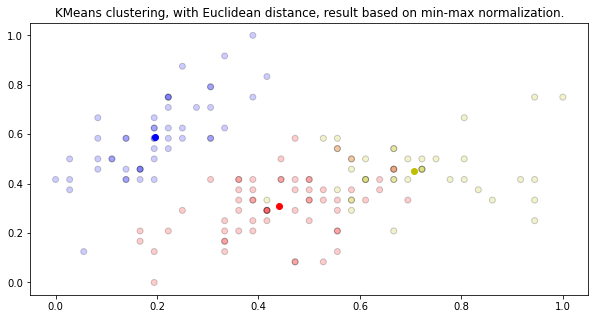

In [26]:
# Plot the graph
fig = plt.figure(figsize=(10,5))
plt.scatter(X["sepal length"],X["sepal width"],alpha = 0.2,color = X_dist["color"],edgecolor="k")
for i in centroids.keys():
    plt.scatter(*centroids[i][:2],color=colors[i])
plt.title("KMeans clustering, with Euclidean distance, result based on min-max normalization.")
plt.show()

In [27]:
# save the final result
X_euc_minmax = X_dist.copy()

#### Using z-score method to normalize

In [28]:
X = iris_zscore[["sepal length","sepal width", "petal length", "petal width"]]

In [29]:
# repeat the same steps as we did in min-max method for z-score method
np.random.seed(202)
centers_index = np.random.choice(np.arange(X.shape[0]), size = k, replace = False)
centroids = {i+1: np.array(X.iloc[centers_index[i]]) for i in range(k)}

In [30]:
X_dist = Euclidian(X,centroids)

In [31]:
# repeat the steps until the clusters don't move anymore
count = 0
while True:
    count += 1
    print("Iteration %d." % count)
    centroids_closest = X_dist["closest"].copy(deep=True)
    centroids = opt(X_dist, centroids)
    X_dist = Euclidian(X,centroids)
    print(X_dist.closest.value_counts())
    if centroids_closest.equals(X_dist["closest"]):
        break

Iteration 1.
2    50
1    50
3    49
Name: closest, dtype: int64
Iteration 2.
1    51
3    49
2    49
Name: closest, dtype: int64
Iteration 3.
1    52
3    49
2    48
Name: closest, dtype: int64
Iteration 4.
1    52
3    49
2    48
Name: closest, dtype: int64


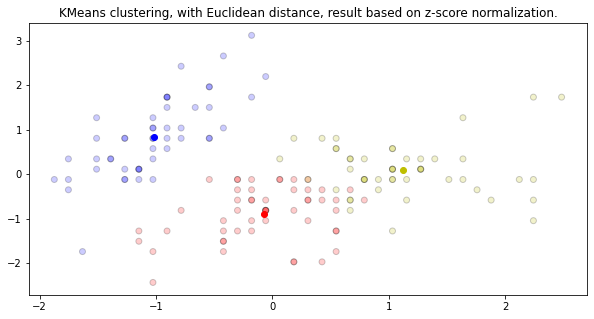

In [32]:
# plot the graph
fig = plt.figure(figsize=(10,5))
plt.scatter(X["sepal length"],X["sepal width"],alpha = 0.2,color = X_dist["color"],edgecolor="k")
for i in centroids.keys():
    plt.scatter(*centroids[i][:2],color=colors[i])
plt.title("KMeans clustering, with Euclidean distance, result based on z-score normalization.")
plt.show()

In [33]:
# save final result
X_euc_zscore = X_dist

## (2)(a)(2) K-Mean Method with Manhattan Distance

In [34]:
# repeat function definition steps we did for Euclidian distance, but replace the Euclidian distance formula with Manhattan distance formula
def Manhattan(X,centroids):
    X_out = X.copy()
    for i in centroids.keys():
        X_out["distance_from_{}".format(i)] = np.array((np.abs(X-centroids[i])).sum(axis = 1))  # manhattan distance
    centroid_distance = ["distance_from_{}".format(i) for i in centroids.keys()]
    X_out["closest"] = X_out.loc[:,centroid_distance].idxmin(axis=1)
    X_out["closest"] = X_out["closest"].map(lambda x: int(x.lstrip("distance_from")))
    X_out["color"] = X_out["closest"].map(lambda x:colors[x])
    return X_out

#### Using min-max to normalize the data

In [35]:
X = iris_minmax[["sepal length","sepal width", "petal length", "petal width"]]

In [36]:
# randomly pick three centroids(x,y) in the randomly distributed data 
np.random.seed(202)
centers_index = np.random.choice(np.arange(X.shape[0]), size = k, replace = False)
centroids = {i+1: np.array(X.iloc[centers_index[i]]) for i in range(k)}

In [37]:
X_dist = Manhattan(X,centroids)

In [38]:
# repeat the steps until the clusters don't move anymore
count = 0
while True:
    count += 1
    print("Iteration %d." % count)
    centroids_closest = X_dist["closest"].copy(deep=True)
    centroids = opt(X_dist, centroids)
    X_dist = Manhattan(X,centroids)
    print(X_dist.closest.value_counts())
    if centroids_closest.equals(X_dist["closest"]):
        break

Iteration 1.
1    58
3    49
2    42
Name: closest, dtype: int64
Iteration 2.
1    61
3    49
2    39
Name: closest, dtype: int64
Iteration 3.
1    61
3    49
2    39
Name: closest, dtype: int64


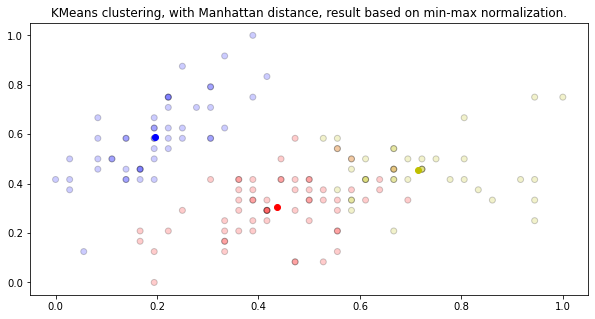

In [39]:
# plot the graph
fig = plt.figure(figsize=(10,5))
plt.scatter(X["sepal length"],X["sepal width"],alpha = 0.2,color = X_dist["color"], edgecolor="k")
for i in centroids.keys():
    plt.scatter(*centroids[i][:2],color=colors[i])
plt.title("KMeans clustering, with Manhattan distance, result based on min-max normalization.")
plt.show()

In [40]:
# save final result
X_man_minmax = X_dist

#### Using z-score to normalize the data

In [41]:
X = iris_zscore[["sepal length","sepal width", "petal length", "petal width"]]

In [42]:
# repeat the same steps as we did in min-max,Manhattan method for z-score method
np.random.seed(202)
centers_index = np.random.choice(np.arange(X.shape[0]), size = k, replace = False)
centroids = {i+1: np.array(X.iloc[centers_index[i]]) for i in range(k)}

In [43]:
X_dist = Manhattan(X,centroids)

In [44]:
# repeat the steps until the clusters don't move anymore
count = 0
while True:
    count += 1
    print("Iteration %d." % count)
    centroids_closest = X_dist["closest"].copy(deep=True)
    centroids = opt(X_dist, centroids)
    X_dist = Manhattan(X,centroids)
    print(X_dist.closest.value_counts())
    if centroids_closest.equals(X_dist["closest"]):
        break

Iteration 1.
1    54
3    49
2    46
Name: closest, dtype: int64
Iteration 2.
1    56
3    49
2    44
Name: closest, dtype: int64
Iteration 3.
1    57
3    49
2    43
Name: closest, dtype: int64
Iteration 4.
1    58
3    49
2    42
Name: closest, dtype: int64
Iteration 5.
1    59
3    49
2    41
Name: closest, dtype: int64
Iteration 6.
1    59
3    49
2    41
Name: closest, dtype: int64


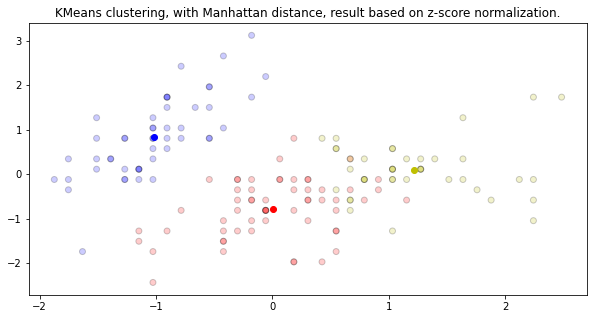

In [45]:
# plot the graph
fig = plt.figure(figsize=(10,5))
plt.scatter(X["sepal length"],X["sepal width"],alpha = 0.2,color = X_dist["color"], edgecolor="k")
for i in centroids.keys():
    plt.scatter(*centroids[i][:2],color=colors[i])
plt.title("KMeans clustering, with Manhattan distance, result based on z-score normalization.")
plt.show()

In [46]:
# save the final result
X_man_zscore = X_dist

## (2)(b)(1) DBSCAN Method with Euclidean Distance

In [47]:
from sklearn.cluster import DBSCAN

#### Using min-max to normalize the data

In [48]:
X = iris_minmax[["sepal length","sepal width", "petal length", "petal width"]].copy()

In [49]:
# fit the DBSCAN model
dbscan_model = DBSCAN(eps=0.25).fit(X)

In [50]:
# save the final cluster result
X_db_euc_minmax = dbscan_model.labels_
X_db_euc_minmax

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

#### Using z-score to normalize the data

In [51]:
X = iris_zscore[["sepal length","sepal width", "petal length", "petal width"]]
X

,sepal length,sepal width,petal length,petal width
0,-1.148356,-0.118060,-1.353964,-1.325063
1,-1.390542,0.344859,-1.410986,-1.325063
2,-1.511636,0.113399,-1.296943,-1.325063
3,-1.027262,1.270695,-1.353964,-1.325063
4,-0.542889,1.965072,-1.182901,-1.061466
...,...,...,...,...
144,1.031326,-0.118060,0.812838,1.442709
145,0.546952,-1.275355,0.698796,0.915514
146,0.789139,-0.118060,0.812838,1.047313
147,0.425859,0.807777,0.926880,1.442709


In [52]:
# fit the DBSCAN model
dbscan_model = DBSCAN().fit(X)

In [53]:
# save the final cluster result
X_db_euc_zscore = dbscan_model.labels_
X_db_euc_zscore

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1], dtype=int64)

## (2)(b)(2) DBSCAN Method with Manhattan Distance

#### Using min-max to normalize the data

In [54]:
X = iris_minmax[["sepal length","sepal width", "petal length", "petal width"]]

In [55]:
# fit the DBSCAN model
dbscan_model = DBSCAN(metric = "manhattan", eps = 0.3).fit(X)  # set distance to manhattan instead of euclidian

In [56]:
# save the final cluster result
X_db_man_minmax = dbscan_model.labels_

In [57]:
X_db_man_minmax

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

#### Using z-score to normalize the data

In [58]:
X = iris_zscore[["sepal length","sepal width", "petal length", "petal width"]]

In [59]:
# fit the DBSCAN model
dbscan_model = DBSCAN(metric = "manhattan", eps = 1).fit(X)

In [60]:
# save the final cluster result
X_db_man_zscore = dbscan_model.labels_

In [61]:
X_db_man_zscore

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

## (3) Evaluate the clustering results based on four external evaluation measures

In [62]:
y_true_label = np.array(iris_data['class'])  # actual labels from iris data

In [63]:
y_true = np.zeros(iris_data.shape[0]) # get a new array filled with 0's

In [64]:
y_true[y_true_label == "Iris-versicolor"] = 1
y_true[y_true_label == "Iris-virginica"] = 2

In [65]:
y_true  # 0: Iris-setosa ;1:Iris-versicolor; 2: Iris-virginica

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [66]:
np.unique(y_true_label, return_counts = True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([49, 50, 50], dtype=int64))

In [67]:
np.unique(y_true, return_counts = True)

(array([0., 1., 2.]), array([49, 50, 50], dtype=int64))

#### Change the cluster labels to match the labels we assigned for each type of flowers

In [68]:
# Kmean - Euclidean - MinMax
y_pred_raw_kmean_euc_minmax = np.array(X_euc_minmax['closest'])
y_pred_kmean_euc_minmax = np.zeros(iris_data.shape[0])
y_pred_kmean_euc_minmax[y_pred_raw_kmean_euc_minmax == 3] = 0   # 0: Iris-setosa ;1:Iris-versicolor; 2: Iris-virginica
y_pred_kmean_euc_minmax[y_pred_raw_kmean_euc_minmax == 1] = 1
y_pred_kmean_euc_minmax[y_pred_raw_kmean_euc_minmax == 2] = 2
y_pred_raw_kmean_euc_minmax

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [69]:
# Kmean - Euclidean - Zscore
y_pred_raw_kmean_euc_zscore = np.array(X_euc_zscore['closest'])
y_pred_kmean_euc_zscore = np.zeros(iris_data.shape[0])
y_pred_kmean_euc_zscore[y_pred_raw_kmean_euc_zscore == 3] = 0
y_pred_kmean_euc_zscore[y_pred_raw_kmean_euc_zscore == 1] = 1
y_pred_kmean_euc_zscore[y_pred_raw_kmean_euc_zscore == 2] = 2
y_pred_raw_kmean_euc_zscore

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [70]:
# Kmean - Manhattan - MinMax
y_pred_raw_kmean_man_minmax = np.array(X_man_minmax['closest'])
y_pred_kmean_man_minmax = np.zeros(iris_data.shape[0])
y_pred_kmean_man_minmax[y_pred_raw_kmean_man_minmax == 3] = 0
y_pred_kmean_man_minmax[y_pred_raw_kmean_man_minmax == 1] = 1
y_pred_kmean_man_minmax[y_pred_raw_kmean_man_minmax == 2] = 2
y_pred_raw_kmean_man_minmax

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [71]:
# Kmean - Manhattan - Zscore
y_pred_raw_kmean_man_zscore = np.array(X_man_zscore['closest'])
y_pred_kmean_man_zscore = np.zeros(iris_data.shape[0])
y_pred_kmean_man_zscore[y_pred_raw_kmean_man_zscore == 3] = 0
y_pred_kmean_man_zscore[y_pred_raw_kmean_man_zscore == 1] = 1
y_pred_kmean_man_zscore[y_pred_raw_kmean_man_zscore == 2] = 2
y_pred_raw_kmean_man_zscore

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [72]:
# DBSCAN - Euclidean - MinMax
y_pred_raw_dbscan_euc_minmax = X_db_euc_minmax
y_pred_dbscan_euc_minmax = np.zeros(iris_data.shape[0])
y_pred_dbscan_euc_minmax[y_pred_raw_dbscan_euc_minmax == 0] = 0
y_pred_dbscan_euc_minmax[y_pred_raw_dbscan_euc_minmax == 1] = 1
y_pred_dbscan_euc_minmax[y_pred_raw_dbscan_euc_minmax == -1] = 2
y_pred_raw_dbscan_euc_minmax

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [73]:
# DBSCAN - Euclidean - Zscore
y_pred_raw_dbscan_euc_zscore = X_db_euc_zscore
y_pred_dbscan_euc_zscore = np.zeros(iris_data.shape[0])
y_pred_dbscan_euc_zscore[y_pred_raw_dbscan_euc_zscore == 0] = 0
y_pred_dbscan_euc_zscore[y_pred_raw_dbscan_euc_zscore == 1] = 1
y_pred_dbscan_euc_zscore[y_pred_raw_dbscan_euc_zscore == -1] = 2
y_pred_raw_dbscan_euc_zscore

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1], dtype=int64)

In [74]:
# DBSCAN - Manhattan - MinMax
y_pred_raw_dbscan_man_minmax = X_db_man_minmax
y_pred_dbscan_man_minmax = np.zeros(iris_data.shape[0])
y_pred_dbscan_man_minmax[y_pred_raw_dbscan_man_minmax == 0] = 0
y_pred_dbscan_man_minmax[y_pred_raw_dbscan_man_minmax == 1] = 1
y_pred_dbscan_man_minmax[y_pred_raw_dbscan_man_minmax == -1] = 2
y_pred_raw_dbscan_man_minmax

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [75]:
# DBSCAN - Manhattan - Zscore
y_pred_raw_dbscan_man_zscore = X_db_man_zscore
y_pred_dbscan_man_zscore = np.zeros(iris_data.shape[0])
y_pred_dbscan_man_zscore[y_pred_raw_dbscan_man_zscore == 0] = 0
y_pred_dbscan_man_zscore[y_pred_raw_dbscan_man_zscore == 1] = 1
y_pred_dbscan_man_zscore[y_pred_raw_dbscan_man_zscore == -1] = 2
y_pred_raw_dbscan_man_zscore

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

## (3)(a) Purity

In [76]:
from sklearn import metrics

In [77]:
confusion = metrics.cluster.contingency_matrix(y_true, y_pred_kmean_euc_minmax)   # use contigency matrix from sklearn
purity_kmean_euc_minmax = np.sum(np.amax(confusion, axis = 0))/149 # sum the number of correctly assigned documents and dividing by total observations

In [78]:
purity_kmean_euc_minmax

0.8859060402684564

In [79]:
confusion = metrics.cluster.contingency_matrix(y_true, y_pred_kmean_euc_zscore)  # repeat for other methods
purity_kmean_euc_zscore = np.sum(np.amax(confusion, axis = 0))/149
purity_kmean_euc_zscore

0.825503355704698

In [80]:
confusion = metrics.cluster.contingency_matrix(y_true, y_pred_kmean_man_minmax)
purity_kmean_man_minmax = np.sum(np.amax(confusion, axis = 0))/149
purity_kmean_man_minmax

0.87248322147651

In [81]:
confusion = metrics.cluster.contingency_matrix(y_true, y_pred_kmean_man_zscore)
purity_kmean_man_zscore = np.sum(np.amax(confusion, axis = 0))/149
purity_kmean_man_zscore

0.8590604026845637

In [82]:
confusion = metrics.cluster.contingency_matrix(y_true, y_pred_dbscan_euc_minmax)
purity_dbscan_euc_minmax = np.sum(np.amax(confusion, axis = 0))/149
purity_dbscan_euc_minmax

0.6644295302013423

In [83]:
confusion = metrics.cluster.contingency_matrix(y_true, y_pred_dbscan_euc_zscore)
purity_dbscan_euc_zscore = np.sum(np.amax(confusion, axis = 0))/149
purity_dbscan_euc_zscore

0.6711409395973155

In [84]:
confusion = metrics.cluster.contingency_matrix(y_true, y_pred_dbscan_man_minmax)
purity_dbscan_man_minmax = np.sum(np.amax(confusion, axis = 0))/149
purity_dbscan_man_minmax

0.6912751677852349

In [85]:
confusion = metrics.cluster.contingency_matrix(y_true, y_pred_dbscan_man_zscore)
purity_dbscan_man_zscore = np.sum(np.amax(confusion, axis = 0))/149
purity_dbscan_man_zscore

0.6711409395973155

| | | Predict Label | | |
| --- | --- | --- | --- | ---| 
| | | setosa | versicolor | virginica |
| True Label | setosa | 44 | 0 | 5 |
| | versicolor | 0 | 43 | 7 |
| | virginica | 0 | 37 | 13 |


## (3)(b) The normalized mutual information (NMI)

In [86]:
from sklearn.metrics import normalized_mutual_info_score as NMI   

In [87]:
nmi_kmean_euc_minmax = NMI(y_true, y_pred_kmean_euc_minmax)       # import NMI within sklearn to calculate NMI for each method
nmi_kmean_euc_zscore = NMI(y_true, y_pred_kmean_euc_zscore)
nmi_kmean_man_minmax = NMI(y_true, y_pred_kmean_man_minmax)
nmi_kmean_man_zscore = NMI(y_true, y_pred_kmean_man_zscore)
nmi_dbscan_euc_minmax = NMI(y_true, y_pred_dbscan_euc_minmax)
nmi_dbscan_euc_zscore = NMI(y_true, y_pred_dbscan_euc_zscore)
nmi_dbscan_man_minmax = NMI(y_true, y_pred_dbscan_man_minmax)
nmi_dbscan_man_zscore = NMI(y_true, y_pred_dbscan_man_zscore)

In [88]:
nmi_kmean_euc_minmax

0.7401557628464956

In [89]:
nmi_kmean_euc_zscore

0.6502114305398888

In [90]:
nmi_kmean_man_minmax

0.7187012437523883

In [91]:
nmi_kmean_man_zscore

0.6948286129099911

In [92]:
nmi_dbscan_euc_minmax

0.7013467618229675

In [93]:
nmi_dbscan_euc_zscore

0.4963910062784228

In [94]:
nmi_dbscan_man_minmax

0.6802561826201569

In [95]:
nmi_dbscan_man_zscore

0.5325077144005281

## (3)(c) The Rand Index

In [96]:
from math import comb

def get_ri(y_true, y_pred):
    g1 = y_pred[:49]                         # get three groups 
    g2 = y_pred[49:99]
    g3 = y_pred[99:150]
    P = comb(49,2)+comb(50,2)+comb(50,2)    #  pick 2(one pair) from each group for combination and and sum them up
    TP = 0
    for i in range(3):
        if sum(g1 == i) >= 2:
            TP += comb(sum(g1 == i), 2)
        if sum(g2 == 0) >= 2:
            TP += comb(sum(g2 == 0), 2)    
        if sum(g3 == 0) >= 2:
            TP += comb(sum(g3 == 0), 2)    
    FP = P - TP
    N = 49*(50+50)+50*50
    TN = 0
    for i in range(3):
        TN += sum(g1 == i)*(sum(g2 != i)+sum(g3 != i))
        TN += sum(g2 == i)*sum(g3 != i)
    FN = N-TN
    RI = (TP+TN)/(TP+FP+FN+TN)
    return(RI)

In [97]:
ri_kmean_euc_minmax = get_ri(y_true, y_pred_kmean_euc_minmax)
ri_kmean_euc_zscore = get_ri(y_true, y_pred_kmean_euc_zscore)
ri_kmean_man_minmax = get_ri(y_true, y_pred_kmean_man_minmax)
ri_kmean_man_zscore = get_ri(y_true, y_pred_kmean_man_zscore)
ri_dbscan_euc_minmax = get_ri(y_true, y_pred_dbscan_euc_minmax)
ri_dbscan_euc_zscore = get_ri(y_true, y_pred_dbscan_euc_zscore)
ri_dbscan_man_minmax = get_ri(y_true, y_pred_dbscan_man_minmax)
ri_dbscan_man_zscore = get_ri(y_true, y_pred_dbscan_man_zscore)

In [98]:
ri_kmean_euc_minmax 

0.7083257754398694

In [99]:
ri_kmean_euc_zscore

0.6903682205695628

In [100]:
ri_kmean_man_minmax

0.7025213132595683

In [101]:
ri_kmean_man_zscore

0.6988935243968801

In [102]:
ri_dbscan_euc_minmax

0.5511518229639035

In [103]:
ri_dbscan_euc_zscore

0.6074732450571376

In [104]:
ri_dbscan_man_minmax

0.5689279883910756

In [105]:
ri_dbscan_man_zscore 

0.5962270995828043

## (3)(d) The F1 measure

In [106]:
def get_f1(y_true, y_pred, beta = 1):
    g1 = y_pred[:49]
    g2 = y_pred[49:99]
    g3 = y_pred[99:150]
    P = comb(49,2)+comb(50,2)+comb(50,2)
    TP = 0
    for i in range(3):
        if sum(g1 == i) >= 2:
            TP += comb(sum(g1 == i), 2)
        if sum(g2 == 0) >= 2:
            TP += comb(sum(g2 == 0), 2)    
        if sum(g3 == 0) >= 2:
            TP += comb(sum(g3 == 0), 2)    
    FP = P - TP
    N = 49*(50+50)+50*50
    TN = 0
    for i in range(3):
        TN += sum(g1 == i)*(sum(g2 != i)+sum(g3 != i))
        TN += sum(g2 == i)*sum(g3 != i)
    FN = N-TN
    P = TP/(TP+FP)
    R = TP/(TP+FN)
    F = ((beta**2+1)*P*R)/((beta**2)*P+R)
    return(F)

In [107]:
f1_kmean_euc_minmax = get_f1(y_true, y_pred_kmean_euc_minmax)
f1_kmean_euc_zscore = get_f1(y_true, y_pred_kmean_euc_zscore)
f1_kmean_man_minmax = get_f1(y_true, y_pred_kmean_man_minmax)
f1_kmean_man_zscore = get_f1(y_true, y_pred_kmean_man_zscore)
f1_dbscan_euc_minmax = get_f1(y_true, y_pred_dbscan_euc_minmax)
f1_dbscan_euc_zscore = get_f1(y_true, y_pred_dbscan_euc_zscore)
f1_dbscan_man_minmax = get_f1(y_true, y_pred_dbscan_man_minmax)
f1_dbscan_man_zscore = get_f1(y_true, y_pred_dbscan_man_zscore)

In [108]:
f1_kmean_euc_minmax

0.4224137931034483

In [109]:
f1_kmean_euc_zscore

0.40790842872008326

In [110]:
f1_kmean_man_minmax

0.41761363636363635

In [111]:
f1_kmean_man_zscore

0.4146685472496474

In [112]:
f1_dbscan_euc_minmax

0.313115891741846

In [113]:
f1_dbscan_euc_zscore

0.29785853341985724

In [114]:
f1_dbscan_man_minmax

0.321871879012698

In [115]:
f1_dbscan_man_zscore

0.3004399748585795

In [116]:
#N

In [117]:
N = 6*(6+5)+6*5

In [118]:
5*(5+3)+1*(2+5)+1*3+4*5+1*2

72

In [119]:
24+72

96

In [120]:
6*(6+5)+6*5

96

## 4(i) Internal measure: the diameter of a cluster

In [121]:
X_minmax = iris_minmax.drop(['class'], axis = 1)
X_zscore = iris_zscore.drop(['class'], axis = 1)

In [122]:
def get_D_euc(y_pred, XX):
    for k in range(3):
        X_small = XX[y_pred == k]
        temp_sum = 0
        N = X_small.shape[0]
        for i in range(N):
            for j in range(N):
                temp_sum += sum((X_small.iloc[i]-X_small.iloc[j])**2)  # euclidean
        if k == 0:
            D0 = np.sqrt(temp_sum/(N*(N-1)))
        if k == 1:
            D1 = np.sqrt(temp_sum/(N*(N-1)))
        if k == 2:
            D2 = np.sqrt(temp_sum/(N*(N-1)))   
    D = D0+D1+D2
    return D

In [123]:
def get_D_man(y_pred, XX):
    for k in range(3):
        X_small = XX[y_pred == k]
        temp_sum = 0
        N = X_small.shape[0]
        for i in range(N):
            for j in range(N):
                temp_sum += sum(np.abs(X_small.iloc[i]-X_small.iloc[j]))  #manhattan
        if k == 0:
            D0 = (temp_sum/(N*(N-1)))
        if k == 1:
            D1 = (temp_sum/(N*(N-1)))
        if k == 2:
            D2 = (temp_sum/(N*(N-1)))   
    D = D0+D1+D2
    return D

In [124]:
D_kmean_euc_minmax = get_D_euc(y_pred_kmean_euc_minmax, X_minmax)
D_dbscan_euc_minmax = get_D_euc(y_pred_dbscan_euc_minmax, X_minmax)

In [125]:
D_kmean_euc_minmax

0.9278279949390631

In [126]:
D_dbscan_euc_minmax

2.300519734304018

In [127]:
D_kmean_euc_zscore = get_D_euc(y_pred_kmean_euc_zscore, X_zscore)
D_dbscan_euc_zscore = get_D_euc(y_pred_dbscan_euc_zscore, X_zscore)

In [128]:
D_kmean_euc_zscore

4.172551115346315

In [129]:
D_dbscan_euc_zscore

5.925237665498879

In [130]:
D_kmean_man_minmax = get_D_man(y_pred_kmean_man_minmax, X_minmax)
D_dbscan_man_minmax = get_D_man(y_pred_dbscan_man_minmax, X_minmax)

In [131]:
D_kmean_man_minmax

1.3984112643802853

In [132]:
D_dbscan_man_minmax

2.6115027979704024

In [133]:
D_kmean_man_zscore = get_D_man(y_pred_kmean_man_zscore, X_zscore)
D_dbscan_man_zscore = get_D_man(y_pred_dbscan_man_zscore, X_zscore)

In [134]:
D_kmean_man_zscore

6.007744109163313

In [135]:
D_dbscan_man_zscore

9.704408766056119

## 4(ii) Interval evaluation measure: Average link between clusters

In [136]:
def get_AL_euc(y_pred, XX):
    X0 = XX[y_pred == 0]
    X1 = XX[y_pred == 1]
    X2 = XX[y_pred == 2]
    dist_sum = 0
    count = 0
    for i in range(X0.shape[0]):
        for j in range(X1.shape[0]):
            dist_sum += np.sum((X0.iloc[i]-X1.iloc[j])**2)
            count += 1
    for i in range(X0.shape[0]):
        for j in range(X2.shape[0]):
            dist_sum += sum((X0.iloc[i]-X2.iloc[j])**2)
            count += 1
    for i in range(X1.shape[0]):
        for j in range(X2.shape[0]):
            dist_sum += sum((X1.iloc[i]-X2.iloc[j])**2)
            count += 1
    Avg_link = np.sqrt(dist_sum/count)            #euclidean
    return(Avg_link)

In [137]:
def get_AL_man(y_pred, XX):
    X0 = XX[y_pred == 0]
    X1 = XX[y_pred == 1]
    X2 = XX[y_pred == 2]
    dist_sum = 0
    count = 0
    for i in range(X0.shape[0]):
        for j in range(X1.shape[0]):
            dist_sum += sum(np.abs(X0.iloc[i]-X1.iloc[j]))
            count += 1
    for i in range(X0.shape[0]):
        for j in range(X2.shape[0]):
            dist_sum += sum(np.abs(X0.iloc[i]-X2.iloc[j]))
            count += 1
    for i in range(X1.shape[0]):
        for j in range(X2.shape[0]):
            dist_sum += sum(np.abs(X1.iloc[i]-X2.iloc[j]))
            count += 1
    Avg_link = dist_sum/count            #manhattan
    return(Avg_link)

In [138]:
AL_kmean_euc_minmax = get_AL_euc(y_pred_kmean_euc_minmax, X_minmax)
AL_dbscan_euc_minmax = get_AL_euc(y_pred_dbscan_euc_minmax, X_minmax)

In [139]:
AL_kmean_euc_minmax

0.8856172441644654

In [140]:
AL_dbscan_euc_minmax

0.9967277654537661

In [141]:
AL_kmean_euc_zscore = get_AL_euc(y_pred_kmean_euc_zscore, X_zscore)
AL_dbscan_euc_zscore = get_AL_euc(y_pred_dbscan_euc_zscore, X_zscore)

In [142]:
AL_kmean_euc_zscore

3.3258875976307207

In [143]:
AL_dbscan_euc_zscore

3.2810654853669923

In [144]:
AL_kmean_man_minmax = get_AL_man(y_pred_kmean_man_minmax, X_minmax)
AL_dbscan_man_minmax = get_AL_man(y_pred_dbscan_man_minmax, X_minmax)

In [145]:
AL_kmean_man_minmax

1.5153771562234721

In [146]:
AL_dbscan_man_minmax

1.7237497905774093

In [147]:
AL_kmean_man_zscore = get_AL_man(y_pred_kmean_man_zscore, X_zscore)
AL_dbscan_man_zscore = get_AL_man(y_pred_dbscan_man_zscore, X_zscore)

In [148]:
AL_kmean_man_zscore

5.8129209155274255

In [149]:
AL_dbscan_man_zscore

5.931959058789201

## 4(iii) Internal evaluation measure: the complete link between two clusters

In [150]:
 #euclidean
def get_CL_euc(y_pred, XX):
    X0 = XX[y_pred == 0]
    X1 = XX[y_pred == 1]
    X2 = XX[y_pred == 2]
    all_dist = []
    for i in range(X0.shape[0]):
        for j in range(X1.shape[0]):
            all_dist.append(np.sqrt(sum((X0.iloc[i]-X1.iloc[j])**2)))
    for i in range(X0.shape[0]):
        for j in range(X2.shape[0]):
            all_dist.append(np.sqrt(sum((X0.iloc[i]-X2.iloc[j])**2)))
    for i in range(X1.shape[0]):
        for j in range(X2.shape[0]):
            all_dist.append(np.sqrt(sum((X1.iloc[i]-X2.iloc[j])**2)))
    Complete_link = np.max(all_dist)       
    return(Complete_link)

In [151]:
# manhattan
def get_CL_man(y_pred, XX):
    X0 = XX[y_pred == 0]
    X1 = XX[y_pred == 1]
    X2 = XX[y_pred == 2]
    all_dist = []
    for i in range(X0.shape[0]):
        for j in range(X1.shape[0]):
            all_dist.append((sum(np.abs(X0.iloc[i]-X1.iloc[j]))))
    for i in range(X0.shape[0]):
        for j in range(X2.shape[0]):
            all_dist.append((sum(np.abs(X0.iloc[i]-X2.iloc[j]))))
    for i in range(X1.shape[0]):
        for j in range(X2.shape[0]):
            all_dist.append((sum(np.abs(X1.iloc[i]-X2.iloc[j]))))
    Complete_link = np.max(all_dist)
    return(Complete_link)

In [152]:
CL_kmean_euc_minmax = get_CL_euc(y_pred_kmean_euc_minmax, X_minmax)
CL_dbscan_euc_minmax = get_CL_euc(y_pred_dbscan_euc_minmax, X_minmax)

In [153]:
CL_kmean_euc_minmax

1.6511874008981202

In [154]:
CL_dbscan_euc_minmax

1.6511874008981202

In [155]:
CL_kmean_euc_zscore = get_CL_euc(y_pred_kmean_euc_zscore, X_zscore)
CL_dbscan_euc_zscore = get_CL_euc(y_pred_dbscan_euc_zscore, X_zscore)

In [156]:
CL_kmean_euc_zscore

6.5438161186009625

In [157]:
CL_dbscan_euc_zscore

6.18359129330217

In [158]:
CL_kmean_man_minmax = get_CL_man(y_pred_kmean_man_minmax, X_minmax)
CL_dbscan_man_minmax = get_CL_man(y_pred_dbscan_man_minmax, X_minmax)

In [159]:
CL_kmean_man_minmax

3.220809792843691

In [160]:
CL_dbscan_man_minmax

3.1527777777777777

In [161]:
CL_kmean_man_zscore = get_CL_man(y_pred_kmean_man_zscore, X_zscore)
CL_dbscan_man_zscore = get_CL_man(y_pred_dbscan_man_zscore, X_zscore)

In [162]:
CL_kmean_man_zscore

12.930190151250294

In [163]:
CL_dbscan_man_zscore

12.200504034519897